In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
f=pd.read_csv('Data_jan.csv',low_memory=False)
f=f.fillna(0)

In [3]:
test=pd.read_csv('Data_mar.csv')
feature=pd.read_csv('features_coefficient2.csv')
test=test.fillna(0)

In [4]:
result=[]
for index, row in feature.iterrows():
    result.append(row[0])

In [5]:
(f[result].join(f['是否离网'])).to_csv('signif_feature.csv',encoding='utf-8-sig',index=False)

PermissionError: [Errno 13] Permission denied: 'signif_feature.csv'

In [5]:
train_set=f[result].drop(['离网日期'], axis=1)
a=pd.get_dummies(f['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_train=b.to_frame('是否离网')

In [6]:
test_set=test[result].drop(['离网日期'], axis=1)
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [7]:
data=['gprs_usg',
'gprs_usg_l1m',
'gprs_usg_l2m',
'过去1月当月数据用量',
'过去2月当月数据用量',
'过去3月当月数据用量','过去4月当月数据用量','过去5月当月数据用量','过去6个月的平均数据量','过去6月当月数据用量']

In [8]:
train_set.at[:,data]=train_set[data]*1E-6

In [9]:
test_set.at[:,data]=test_set[data]*1E-6

In [10]:
test_set[data]

,gprs_usg,gprs_usg_l1m,gprs_usg_l2m,过去1月当月数据用量,过去2月当月数据用量,过去3月当月数据用量,过去4月当月数据用量,过去5月当月数据用量,过去6个月的平均数据量,过去6月当月数据用量
0,20.054655,20.072149,13.386883,21.891267,25.236190,18.639507,20.212404,18.444347,20.746395,20.054655
1,18.447855,25.786738,35.889984,27.456425,30.916985,50.615317,30.186321,22.971159,30.099010,18.447855
2,0.000000,0.000000,0.000000,0.006242,0.003767,0.001760,0.000883,0.000000,0.002109,0.000000
3,6.319932,8.322166,3.826727,5.282335,4.812649,4.953213,6.870274,5.036742,5.545857,6.319932
4,3.209420,2.514846,1.802651,1.444235,2.522236,3.930155,3.343914,2.446531,2.816082,3.209420
...,...,...,...,...,...,...,...,...,...,...
101681,0.319405,0.116116,0.283810,0.024948,0.333550,0.055529,0.301918,0.322796,0.226358,0.319405
101682,26.882535,19.574679,30.596648,23.627446,21.349842,19.612601,15.651787,26.290867,22.235846,26.882535
101683,0.000000,0.000000,0.000000,1.783382,0.000000,0.000000,0.000000,0.000000,0.297230,0.000000
101684,1.595140,0.356092,0.000000,1.698134,0.000000,2.708393,0.000000,0.000000,1.000278,1.595140


--------------------SVM-------------------------

In [11]:
# clf = svm.SVC(kernel='nonlinear')
clf = svm.NuSVC(kernel='rbf',nu=0.01)

In [12]:
train_set.iloc[:90000].to_numpy()
y_train.iloc[:90000]['是否离网'].to_numpy()

array([ 1,  1,  1, ..., -1,  1,  1])

In [13]:
clf.fit(train_set.to_numpy(), y_train['是否离网'].to_numpy())

NuSVC(nu=0.01)

In [14]:
y_pred = clf.predict(test_set.to_numpy())

In [15]:
val=y_pred-y_test['是否离网'].to_numpy()

In [16]:
val

array([0, 2, 0, ..., 0, 0, 0])

In [17]:
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100


89.1017445862754

In [65]:
clf.dual_coef_[0]

array([ 1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.86533453e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  1.93036837e+04,  1.93036837e+04,  1.93036837e+04,
        1.93036837e+04,  

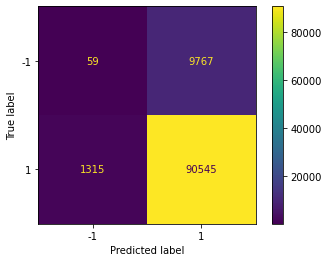

In [18]:
cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [48]:
temp=pd.DataFrame({'feature':train_set.columns.tolist(),'coeff':clf.coef_[0]})
temp.to_csv('features_coefficient3.csv',encoding='utf-8-sig',index=False)

AttributeError: coef_ is only available when using a linear kernel

In [54]:
pd.DataFrame(clf.support_vectors_)

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.655317,27.0,5.0,147.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.894577,9.0,43.0,38.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.756068,30.0,312.0,177.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,5.444678,29.0,199.0,173.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.434536,8.0,321.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,95.0,0.0,0.0,0.0,18.0,0.000000,0.0,0.0,11.0
934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,133.0,0.0,0.0,0.0,31.0,0.000000,0.0,0.0,0.0
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,6.386421,19.0,59.0,122.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.0,3.0,0.0,0.0,4.0,0.000000,0.0,0.0,8.0
